In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'XOM'

mysql = Mysql()

In [3]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-26 17:00:00,37.545,38.560,37.880,38.400,0.000000,4627030
1,2020-03-26 18:00:00,37.250,38.330,38.280,37.900,-0.005965,4406933
2,2020-03-26 19:00:00,37.515,39.000,38.700,38.280,0.017480,9802738
3,2020-03-26 20:00:00,38.480,38.920,38.700,38.920,-0.002051,4795765
4,2020-03-26 21:00:00,38.700,38.880,38.880,38.700,-0.001028,26540
...,...,...,...,...,...,...,...
1,2021-03-26 13:00:00,56.830,57.485,56.900,57.020,0.006214,3346644
2,2021-03-26 14:00:00,56.590,57.060,56.600,56.900,-0.007393,1323147
3,2021-03-26 15:00:00,56.540,56.870,56.700,56.660,-0.003330,2028565


In [4]:
data = mysql.get_closes_by_symbol(ticker)

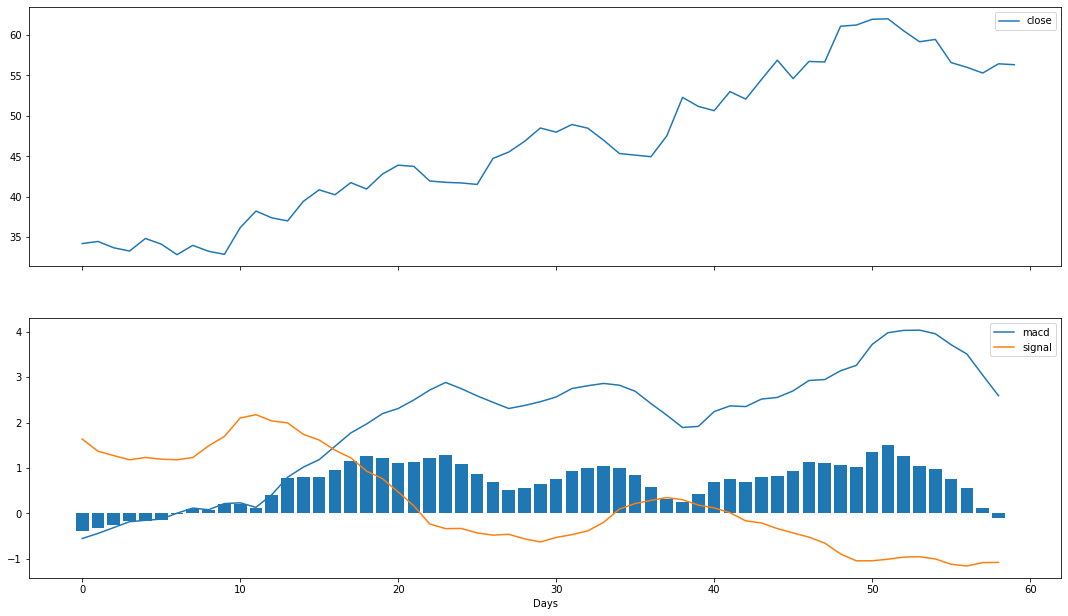

In [5]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

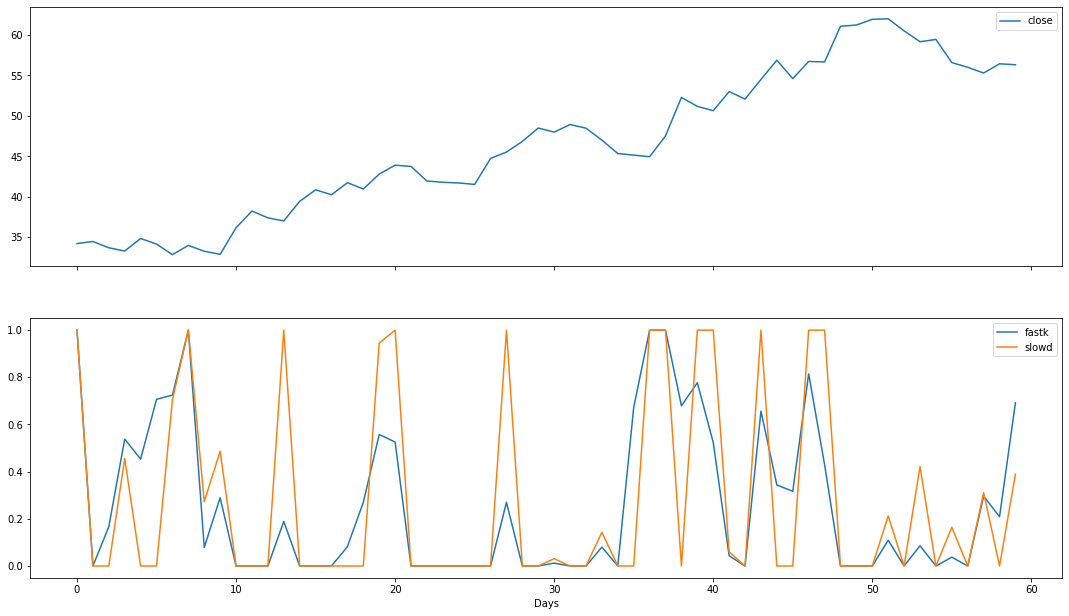

In [6]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)